In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [5]:
df.shape

(15039, 11)

In [6]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<ipython-input-7-e20fb40e9a0c>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

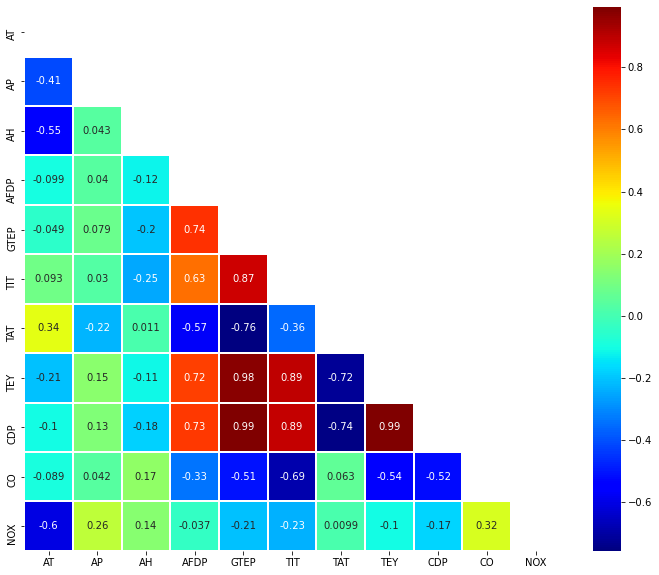

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_df=scale.fit_transform(df)
scaled_df

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [10]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


# X&y

In [11]:
X=scaled_df.drop(columns=['TEY'], axis=1)
y=scaled_df['TEY']

In [12]:
# Splitting data into test data and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## Tuning of Hyperparameters :- Batch Size and Epochs

In [16]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [17]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model

In [18]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [20]:
grid_result = grid.fit(X_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.750 total time=   7.3s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.712 total time=   7.3s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.351 total time=   6.8s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.720 total time=   6.9s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.702 total time=   6.8s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=40, epochs=100;, score=-0.750 total time=  15.5s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=40, epochs=100;, score=-0.712 total time=  16.2s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=40, epochs=100;, score=-0.350 total time=  16.6s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=40, epochs=100;, score=-0.383 total time=  16.0s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=40, epochs=100;, score=-0.702 total time=  16.1s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=40, epochs=200;, score=-0.750 total time=  32.5s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [21]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.5090859055519104, using {'batch_size': 10, 'epochs': 100}
-0.647248488664627,0.1489407184759909 with: {'batch_size': 10, 'epochs': 10}
-0.649633115530014,0.1292061354976103 with: {'batch_size': 10, 'epochs': 50}
-0.5090859055519104,0.1694402971981202 with: {'batch_size': 10, 'epochs': 100}
-0.6569549858570098,0.13464231754976386 with: {'batch_size': 10, 'epochs': 200}
-0.5186998724937439,0.17764613553852135 with: {'batch_size': 20, 'epochs': 10}
-0.6493197023868561,0.12983199738313178 with: {'batch_size': 20, 'epochs': 50}
-0.524935644865036,0.17275793302799897 with: {'batch_size': 20, 'epochs': 100}
-0.5883126258850098,0.15530569706293895 with: {'batch_size': 20, 'epochs': 200}
-0.5184061110019684,0.17136782789298094 with: {'batch_size': 40, 'epochs': 10}
-0.5853120803833007,0.15893660791530145 with: {'batch_size': 40, 'epochs': 50}
-0.5796591699123382,0.17483529962859423 with: {'batch_size': 40, 'epochs': 100}
-0.5898912250995636,0.16611801996135694 with: {'batch_size': 40,

## Tuning of Hyperparameters:- Learning rate and Drop out rate

In [23]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(units=8,kernel_initializer='uniform',activation="relu",input_dim=10)) #Input layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=12,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=12,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=12,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1,kernel_initializer='uniform',activation="sigmoid"))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model

# Create the model

model=KerasRegressor(build_fn=create_model,batch_size=10,epochs=100,verbose=0)

# Define the grid search parameters

learning_rate = [0.001,0.01]
dropout_rate = [0.0,0.1]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)

In [25]:
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=-0.576 total time= 3.6min
[CV 2/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=-0.345 total time= 3.6min
[CV 3/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=-0.459 total time= 3.5min
[CV 4/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=-0.424 total time= 3.6min
[CV 5/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=-0.543 total time= 3.5min
[CV 1/5; 2/4] START dropout_rate=0.0, learning_rate=0.01........................
[CV 

In [26]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.46934273838996887, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.46934273838996887,0.08294668051119343 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.4719320714473724,0.08418927431867988 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.470250803232193,0.08311973012687197 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.4821855366230011,0.07633390291406539 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}


## Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [27]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(units=8,kernel_initializer='uniform',activation="relu",input_dim=10)) #Input layer
    model.add(Dropout(0))
    model.add(Dense(units=12,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(0))
    model.add(Dense(units=12,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(0))
    model.add(Dense(units=12,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(0))
    model.add(Dense(units=1,kernel_initializer='uniform',activation="sigmoid"))
    
    adam = Adam(lr = 0.001)
    model.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model

# Create the model

model=KerasRegressor(build_fn=create_model,batch_size=10,epochs=100,verbose=0)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)

In [29]:
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 1/5; 1/9] END activation_function=softmax, init=uniform;, score=-0.575 total time= 2.9min
[CV 2/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 2/5; 1/9] END activation_function=softmax, init=uniform;, score=-0.344 total time= 3.1min
[CV 3/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 3/5; 1/9] END activation_function=softmax, init=uniform;, score=-0.460 total time= 3.2min
[CV 4/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 4/5; 1/9] END activation_function=softmax, init=uniform;, score=-0.424 total time= 2.9min
[CV 5/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 5/5; 1/9] END activation_function=softmax, init=uniform;, score=-0.545 total time= 3.0min
[CV 1/5; 2/9] START activation_function=softmax, init=normal.....

In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.46935856342315674, using {'activation_function': 'relu', 'init': 'uniform'}
-0.46989536881446836,0.0832753678980446 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.4696294844150543,0.0832794658050008 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.46959850788116453,0.08315670874024732 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.46935856342315674,0.08318366283284893 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.5334048271179199,0.19298700011643136 with: {'activation_function': 'relu', 'init': 'normal'}
-0.4699999153614044,0.08274619244919468 with: {'activation_function': 'relu', 'init': 'zero'}
-0.469704407453537,0.08329171835341061 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.47006368041038515,0.08403895755821462 with: {'activation_function': 'tanh', 'init': 'normal'}
-0.4699597477912903,0.08357212225083094 with: {'activation_function': 'tanh', 'init': 'zero'}


## Training model with optimum values of Hyperparameters

In [31]:
from sklearn.metrics import mean_squared_error

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(4,kernel_initializer='uniform',activation="relu",input_dim=10)) #Input layer
    model.add(Dropout(0))
    model.add(Dense(4,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(0))
    model.add(Dense(6,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(0))
    model.add(Dense(4,kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(0))
    model.add(Dense(units=1,kernel_initializer='uniform',activation="sigmoid"))
    
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model

# Create the model

model=KerasRegressor(build_fn=create_model,batch_size=10,epochs=100,verbose=0)



In [32]:
# Fitting the model

model.fit(X_train,y_train)


In [41]:
# Predicting using trained model

y_predict_test = model.predict(X_train)

y_predict_test = model.predict(X_test) 


In [45]:
# Printing the metrics
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))